# Gráficos - Región Pampeana
## Importación y filtrado de encuesta

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  


In [5]:
from hogares import EncuestaHogares

encuesta = EncuestaHogares("usu_hogar_T324.xlsx", "usu_individual_T324.xlsx")
hogares, personas = encuesta.memoria()
hogares, personas = encuesta.filtrados_por_region(43, hogares, personas)
hogares_personas = encuesta.df_hogares_personas(hogares, personas)

## Análisis de Variables Individuales
### Ingreso e Ingreso Ponderado
Cuantitativa Continua

In [12]:
hogares_personas[hogares_personas["ingreso"] !=-9][["ingreso", "ingreso_ponderado", "edad", "PONDERA_x", "PONDERA_y"]]

,ingreso,ingreso_ponderado,edad,PONDERA_x,PONDERA_y
2,1750000.0,401,81,277,277
3,400000.0,354,78,277,277
4,1200000.0,328,65,281,281
5,435600.0,366,66,281,281
6,1125000.0,362,30,281,281
...,...,...,...,...,...
14310,1300000.0,1374,34,727,727
14311,0.0,318,48,318,318
14312,750000.0,502,54,318,318
14313,275000.0,867,74,665,665


Reemplazando los ingresos en -9 por 0.

In [18]:
hogares_personas[hogares_personas["ingreso"] == -9]["ingreso"] = 0
hogares_personas.loc[(hogares_personas["ingreso"] == -9), 'ingreso'] = 0


In [20]:
hogares_personas[["ingreso"]].describe()

,ingreso
count,1.430000e+04
mean,2.953937e+05
std,4.934710e+05
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,4.300000e+05
max,1.237000e+07


(array([1.0647e+04, 2.1370e+03, 9.1500e+02, 3.2500e+02, 1.3700e+02,
        4.0000e+01, 4.4000e+01, 2.4000e+01, 1.1000e+01, 7.0000e+00,
        5.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([       0.        ,   412333.33333333,   824666.66666667,
         1237000.        ,  1649333.33333333,  2061666.66666667,
         2474000.        ,  2886333.33333333,  3298666.66666667,
         3711000.        ,  4123333.33333333,  4535666.66666667,
         4948000.        ,  5360333.33333333,  5772666.66666667,
         6185000.        ,  6597333.33333333,  7009666.66666667,
         7422000.        ,  7834333.33333333,  8246666.66666667,
         8659000.        ,  9071333.33333333,  9483666.66666667,
         9896000.        , 10308333.33333333, 10720666.66666667,
     

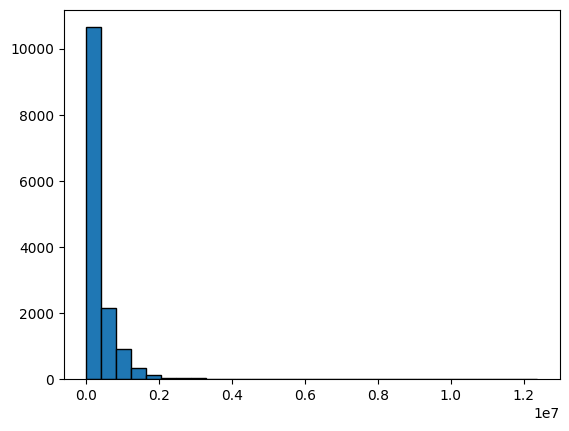

In [25]:
plt.hist(hogares_personas["ingreso"], edgecolor='black', bins=30)